<a href="https://colab.research.google.com/github/rahafabumwise/coffee-machine-python/blob/main/notebooks/_Data_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download And Perpare Data

In [2]:
import kagglehub
import os
import pandas as pd
path = kagglehub.dataset_download("psparks/instacart-market-basket-analysis")
files_names = os.listdir(path)
datasets = {}
for file in files_names:
  name = file.removesuffix(".csv")
  datasets[name] = pd.read_csv(f"{path}/{file}")

100%|██████████| 197M/197M [00:10<00:00, 20.6MB/s]

Extracting files...


**Join**

In [3]:
import numpy as np
import pandas as pd

#Display table sizes within datasets

for k, v in datasets.items():
    print(k, v.shape)

# orders
#Preparing orders and optimizing memory (Memory Optimization)

orders = datasets["orders"]
orders["order_id"] = orders["order_id"].astype("int32")
orders["user_id"] = orders["user_id"].astype("int32")
orders["order_number"] = orders["order_number"].astype("int16")
orders["order_dow"] = orders["order_dow"].astype("int8")
orders["order_hour_of_day"] = orders["order_hour_of_day"].astype("int8")
orders["eval_set"] = orders["eval_set"].astype("category")
orders["days_since_prior_order"] = orders["days_since_prior_order"].astype("float32")

# products
# Preparing products and optimizing memory (Memory Optimization)
products = datasets["products"]
products["product_id"] = products["product_id"].astype("int32")
products["aisle_id"] = products["aisle_id"].astype("int16")
products["department_id"] = products["department_id"].astype("int16")

# aisles
#Preparing aisles and optimizing memory (Memory Optimization)
aisles = datasets["aisles"]
aisles["aisle_id"] = aisles["aisle_id"].astype("int16")

# departments
# Preparing departments and optimizing memory (Memory Optimization)
departments = datasets["departments"]
departments["department_id"] = departments["department_id"].astype("int16")

# order_products_prior ONLY
op_prior = datasets["order_products__prior"]
op_prior["order_id"] = op_prior["order_id"].astype("int32")
op_prior["product_id"] = op_prior["product_id"].astype("int32")
op_prior["add_to_cart_order"] = op_prior["add_to_cart_order"].astype("int16")
op_prior["reordered"] = op_prior["reordered"].astype("int8")


# Product dimension table (products + aisles + departments)
products_enriched = (
    products
    .merge(aisles, on="aisle_id", how="left")
    .merge(departments, on="department_id", how="left")
)

products_enriched.head()

#PRIOR full table
prior_full = (
    op_prior
    .merge(orders, on="order_id", how="left")
    .merge(products_enriched, on="product_id", how="left")
)

prior_full.head()

print("prior_full shape:", prior_full.shape)

aisles (134, 2)
order_products__train (1384617, 4)
orders (3421083, 7)
products (49688, 4)
departments (21, 2)
order_products__prior (32434489, 4)
prior_full shape: (32434489, 15)


#Explore the data

I will provide a full description of the data after I join it.

In [ ]:
prior_full.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object')

In [ ]:
prior_full.shape

(32434489, 15)

In [ ]:
prior_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   product_id              int32   
 2   add_to_cart_order       int16   
 3   reordered               int8    
 4   user_id                 int32   
 5   eval_set                category
 6   order_number            int16   
 7   order_dow               int8    
 8   order_hour_of_day       int8    
 9   days_since_prior_order  float32 
 10  product_name            object  
 11  aisle_id                int16   
 12  department_id           int16   
 13  aisle                   object  
 14  department              object  
dtypes: category(1), float32(1), int16(4), int32(3), int8(3), object(3)
memory usage: 1.6+ GB


In [ ]:
prior_full.describe()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.035642e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01,1.029372e+05,1.714205e+01,2.738818e+00,1.342498e+01,1.110406e+01,7.121430e+01,9.921906e+00
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01,5.946648e+04,1.753504e+01,2.090049e+00,4.246365e+00,8.377106e+00,3.820302e+01,6.281156e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00,5.142100e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,4.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00,1.026110e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,9.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.600000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,2.100000e+01


**Exploratory Data Analysis (EDA)**

In [ ]:
prior_full.keys()

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object')

**Missing Values ​​/ NaN**

Here we notice that there is only the days_since_prior_order column.which contains missing values.

In [ ]:
missing = prior_full.isnull().sum()
missing

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,2078068


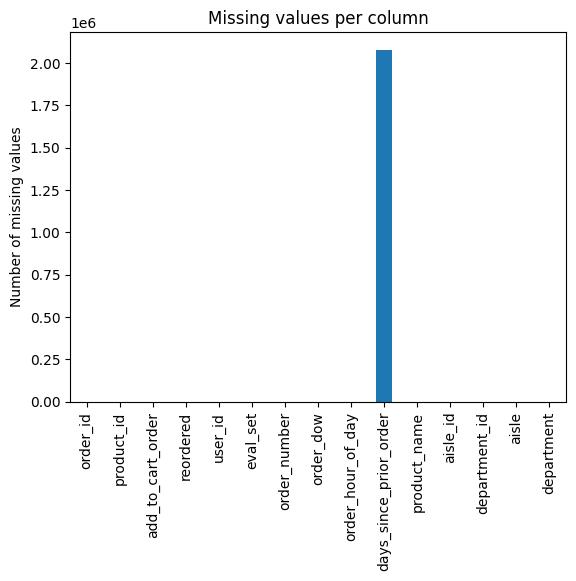

In [ ]:

import matplotlib.pyplot as plt
missing.plot(kind="bar")
plt.ylabel("Number of missing values")
plt.title("Missing values per column")
plt.show()

**Duplicates**

no duplicates in datasets

In [ ]:
prior_full.duplicated().any()

np.False_

**Numerical plots**

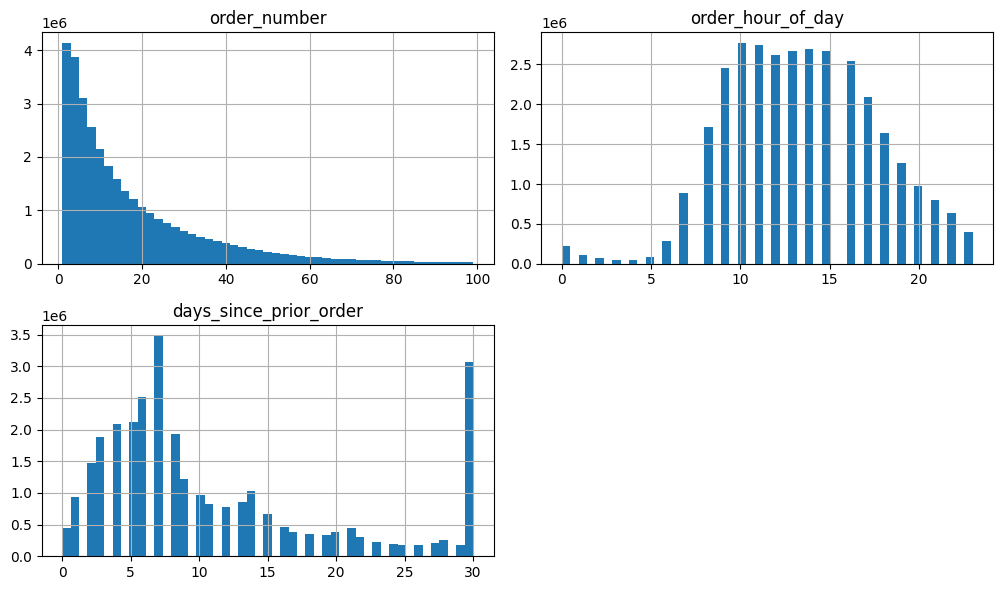

In [6]:
import matplotlib.pyplot as plt

numeric_columns = ["order_number", "order_hour_of_day", "days_since_prior_order"]
prior_full[numeric_columns].hist(bins=49,figsize=(10,6))
plt.tight_layout()
plt.show()


**Density**

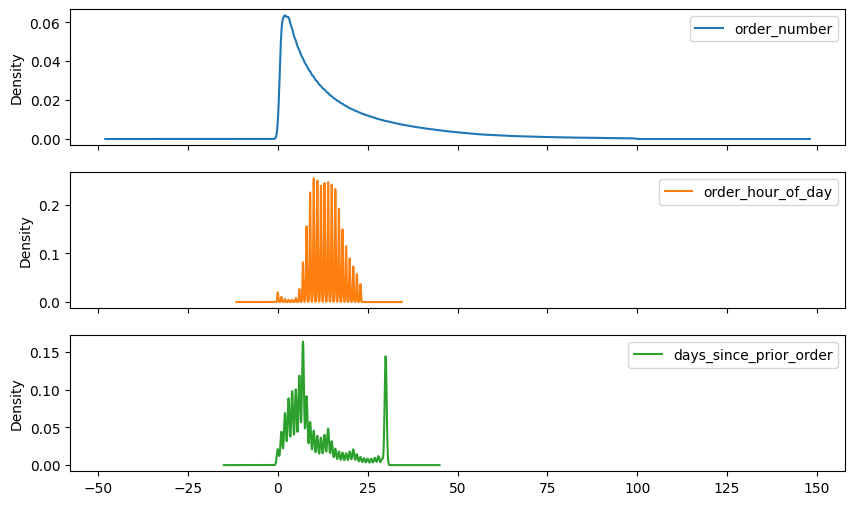

In [ ]:
prior_full[numeric_columns].plot(kind="density", subplots=True, figsize=(10,6))
plt.show()

Sample

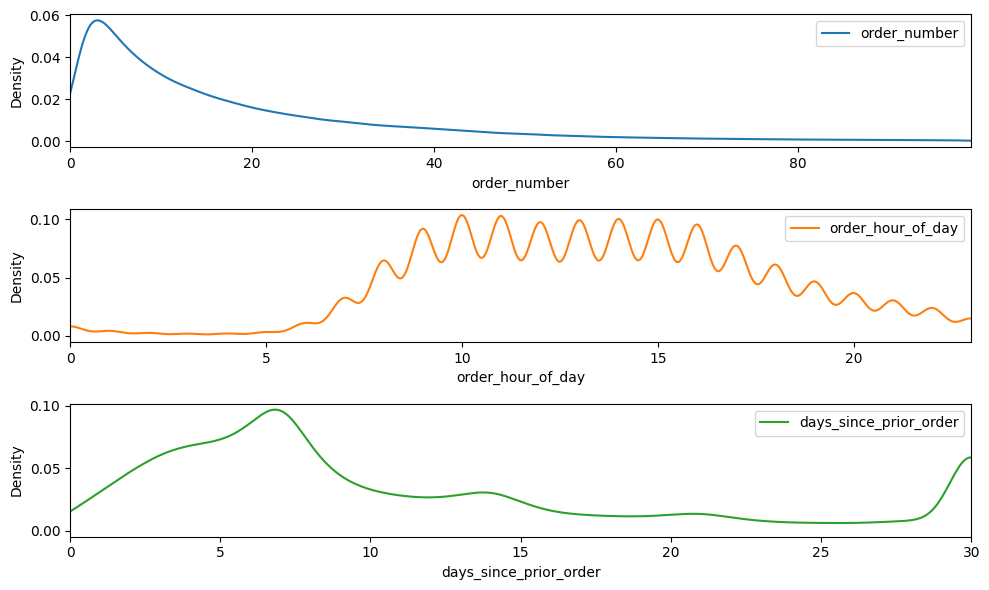

In [ ]:

sample_prior = prior_full[numeric_columns].sample(frac=0.01,random_state=42)

axes = sample_prior.plot(kind="density",subplots=True,figsize=(10,6),sharex=False)

for ax, col in zip(axes, numeric_columns):
    ax.set_xlim(0, sample_prior[col].max())
    ax.set_xlabel(col)
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()


**Cardinality**

Cardinality (number of unique values) per categorical column

In [ ]:
Card_columns = ["eval_set", "department", "aisle"]
cardinality = prior_full[Card_columns].nunique()
print(cardinality)

eval_set        1
department     21
aisle         134
dtype: int64


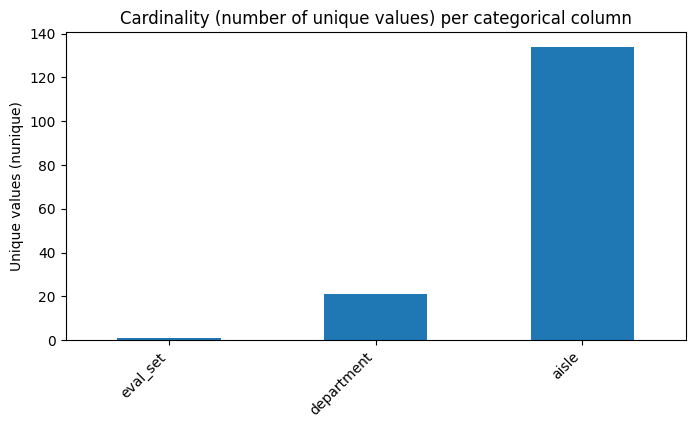

In [ ]:
plt.figure(figsize=(8,4))
cardinality.plot(kind="bar")
plt.title("Cardinality (number of unique values) per categorical column")
plt.ylabel("Unique values (nunique)")
plt.xticks(rotation=45, ha="right")
plt.show()

**Top-k Frequencies**

I found the most frequent values ​​(Top-k) and plotted them using a bar graph.

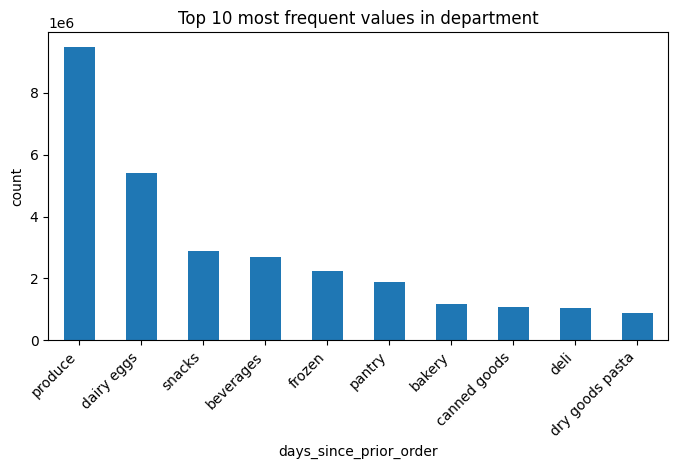

In [ ]:
departments="department"
top_department= prior_full[departments].value_counts().head(10)
plt.figure(figsize=(8,4))
top_department.plot(kind="bar")
plt.title(f"Top 10 most frequent values in {departments}")
plt.ylabel("count")
plt.xlabel(col)
plt.xticks(rotation=45, ha="right")
plt.show()


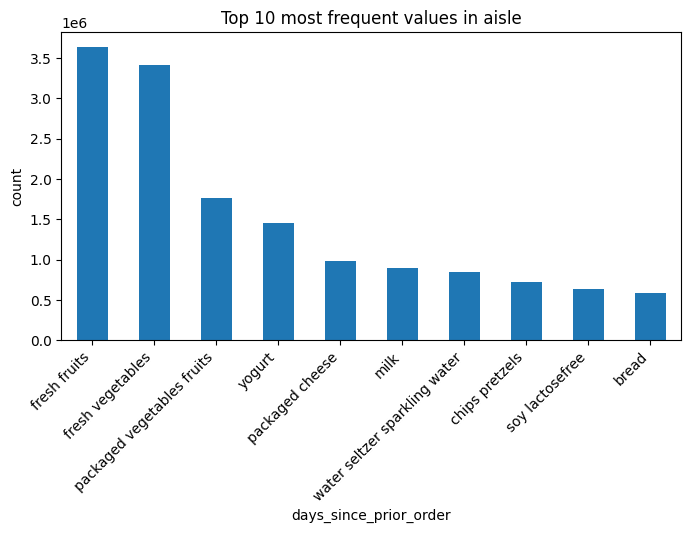

In [ ]:
aisles="aisle"
top_aisle=prior_full["aisle"].value_counts().head(10)
plt.figure(figsize=(8,4))
top_aisle.plot(kind="bar")
plt.title(f"Top 10 most frequent values in {aisles}")
plt.ylabel("count")
plt.xlabel(col)
plt.xticks(rotation=45, ha="right")
plt.show()

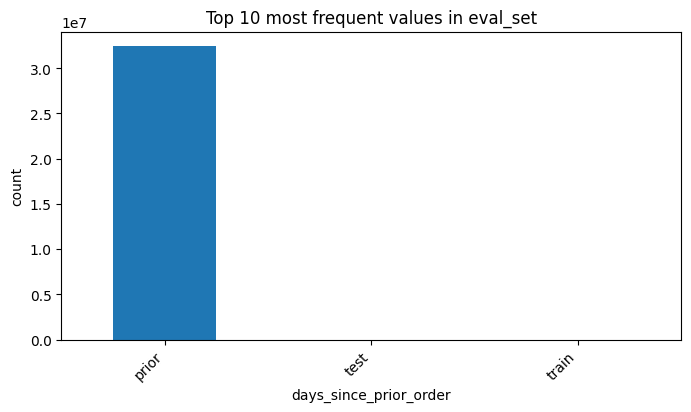

In [ ]:
eval_sets="eval_set"
top_eval_set=prior_full["eval_set"].value_counts().head(10)
plt.figure(figsize=(8,4))
top_eval_set.plot(kind="bar")
plt.title(f"Top 10 most frequent values in {eval_sets}")
plt.ylabel("count")
plt.xlabel(col)
plt.xticks(rotation=45, ha="right")
plt.show()

**Correlation matrix, heatmap and pairwise scatter plots for selected numeric features**

In [ ]:
import numpy as np
num_cols = ["order_number","order_hour_of_day","days_since_prior_order","add_to_cart_order","reordered"]
sample_df = prior_full[num_cols].dropna()
corrilation= sample_df.corr()
print(corrilation)

                        order_number  order_hour_of_day  \
order_number                1.000000          -0.039478   
order_hour_of_day          -0.039478           1.000000   
days_since_prior_order     -0.358422           0.003878   
add_to_cart_order          -0.004921          -0.014972   
reordered                   0.250973          -0.021142   

                        days_since_prior_order  add_to_cart_order  reordered  
order_number                         -0.358422          -0.004921   0.250973  
order_hour_of_day                     0.003878          -0.014972  -0.021142  
days_since_prior_order                1.000000           0.053951  -0.132814  
add_to_cart_order                     0.053951           1.000000  -0.145232  
reordered                            -0.132814          -0.145232   1.000000  


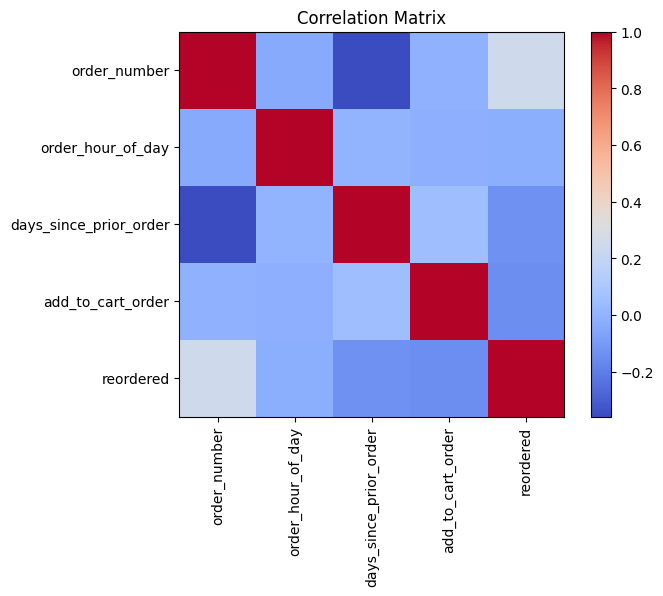

In [ ]:
plt.figure(figsize=(7,5))
corr_matrix = plt.imshow(corrilation, cmap="coolwarm")
plt.colorbar(corr_matrix)
plt.xticks(range(len(corrilation.columns)), corrilation.columns, rotation=90)
plt.yticks(range(len(corrilation.columns)), corrilation.columns)
plt.title("Correlation Matrix")
plt.show()

Here, I'll establish a relationship between just three columns (order_number ,days_since_prior_order ,add_to_cart_order ) to answer these questions:

*Do users with a high order number place orders in fewer days?

→ order_number vs days_since_prior_order

*Does the order in which products are added to the cart affect purchasing behavior?

→ add_to_cart_order vs order_number

*Are products added first more likely to be reordered?



---

**1)** Why does the output look like this?

`days_since_prior_order` has a fixed, discrete value (0 to 30 days only).

While `order_number` increments gradually (1 → 100+).

Each `days` value (e.g., 7 days) is repeated thousands of times \with different order numbers.
There is no clear linear relationship.
Each constant value in days_since_prior_order draws a horizontal line.

Therefore, the shape is now composed of horizontal layers.
This is a recurring time-based behavior (weekly/bi-weekly).

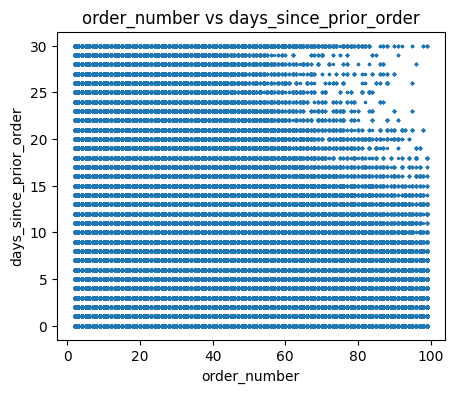

In [ ]:
col1 = "order_number"
col2 = "days_since_prior_order"
col3 = "add_to_cart_order"

corr_3_columns = prior_full[[col1, col2, col3]].dropna()
plt.figure(figsize=(5,4))
plt.scatter(corr_3_columns[col1], corr_3_columns[col2], s=2)
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f"{col1} vs {col2}")
plt.show()



---


**2)** We observe here that the dispersion decreases as the order_number increases.
User behavior becomes more stable over time. Because over time:
Users know what they want,
Requests decrease,
Addition order decreases.

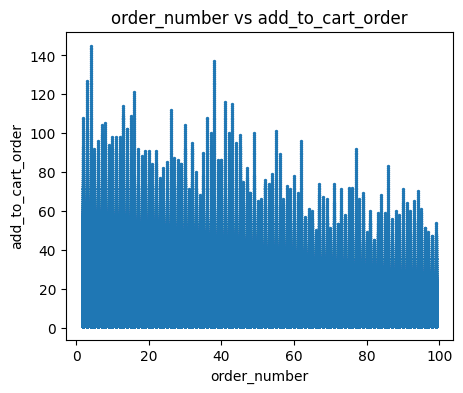

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(corr_3_columns[col1], corr_3_columns[col3], s=2)
plt.xlabel(col1)
plt.ylabel(col3)
plt.title(f"{col1} vs {col3}")
plt.show()



---


**3)** Here, both variables are discrete.
The diagram appears as vertical columns.

This means there isn't a strong, direct relationship, because the waiting time between orders doesn't determine the size or arrangement of the basket.


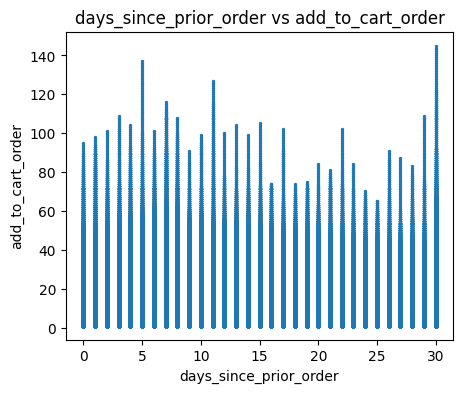

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(corr_3_columns[col2], sample_df[col3], s=2)
plt.xlabel(col2)
plt.ylabel(col3)
plt.title(f"{col2} vs {col3}")
plt.show()

**Time-of-day**

Here I will find the order distribution by hour

In [ ]:
hour_counts = prior_full["order_hour_of_day"].value_counts().sort_index()

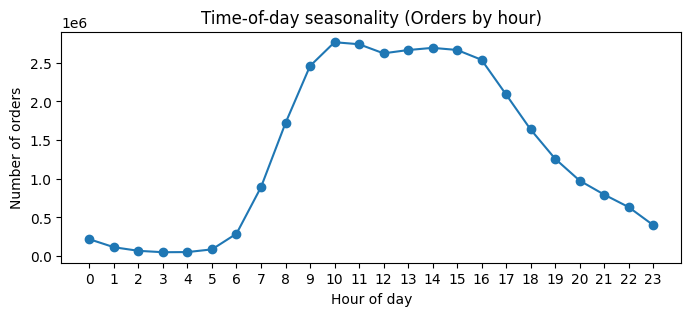

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(hour_counts.index, hour_counts.values, marker="o")
plt.xticks(range(0,24))
plt.title("Time-of-day seasonality (Orders by hour)")
plt.xlabel("Hour of day")
plt.ylabel("Number of orders")
plt.show()

**Day-of-week**

Here I will find the distribution of orders by day

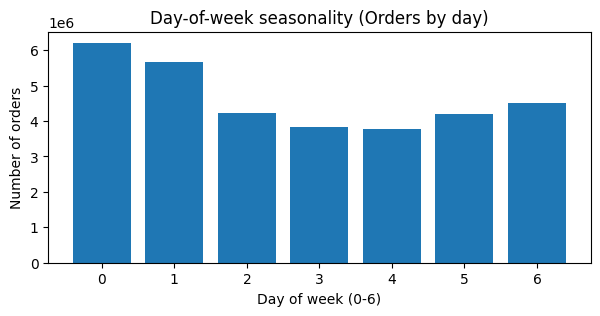

In [ ]:
dow_counts = prior_full["order_dow"].value_counts().sort_index()
plt.figure(figsize=(7,3))
plt.bar(dow_counts.index, dow_counts.values)
plt.title("Day-of-week seasonality (Orders by day)")
plt.xlabel("Day of week (0-6)")
plt.ylabel("Number of orders")
plt.show()

**Monthly seasonality**

There is no actual date in the data, so we make an “approximate” month using days_since_prior_order (cumulative for each user) and then divide by 30.

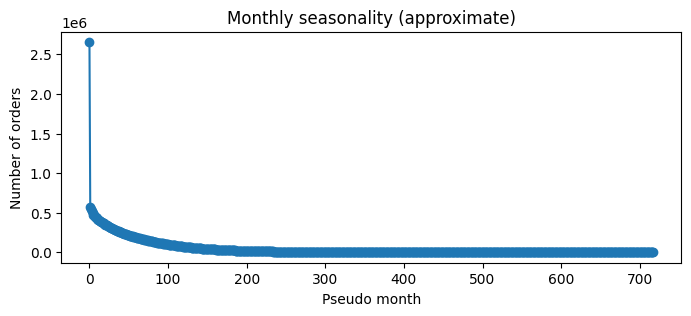

In [ ]:
tmp = prior_full[["user_id", "order_number", "days_since_prior_order"]]
tmp = tmp.sort_values(["user_id", "order_number"])
tmp["days_since_prior_order"] = tmp["days_since_prior_order"].fillna(0)
tmp["days_from_first_order"] = (
    tmp.groupby("user_id")["days_since_prior_order"].cumsum()
)
tmp["pseudo_month"] = (tmp["days_from_first_order"] // 30).astype(int)
month_counts = tmp["pseudo_month"].value_counts().sort_index()
plt.figure(figsize=(8,3))
plt.plot(month_counts.index, month_counts.values, marker="o")
plt.xlabel("Pseudo month")
plt.ylabel("Number of orders")
plt.title("Monthly seasonality (approximate)")
plt.show()

#Feature Engineering

##user features

In [7]:
prior_full_copy = prior_full.copy()

In [8]:
###our unique idietifer for these features will be user_id
###total order:The total number of orders placed by each user
user_features = pd.DataFrame({'user_id': prior_full_copy['user_id'].unique()})
user_total = prior_full_copy.groupby('user_id')['order_number'].max().reset_index(name='user_total_orders')

###basket_size_per_order:This feature is used to measure the average basket size for each user, meaning the average number of products a user adds to an order.
basket = prior_full_copy.groupby(['user_id','order_id'])['product_id'].count().reset_index(name='basket_size')
user_avg_basket = basket.groupby('user_id')['basket_size'].mean().reset_index(name='user_average_basket')

###reorder ratio:This feature represents whether a user tends to buy new products or reorder the same products more often.
user_reorder = prior_full_copy.groupby('user_id')['reordered'].mean().reset_index(name='user_reorder_ratio')

###Mean Days Between Orders: This feature represents how many days typically pass between orders for the same user, showing whether the user is a daily, weekly, monthly, or less frequent buyer.
user_days = prior_full_copy.groupby('user_id')['days_since_prior_order'].mean().reset_index(name='user_mean_days_between_order')

### Last Inter-Order Gap: Days between the user’s two most recent prior orders.
user_last_interorder_gap = prior_full_copy.sort_values(['user_id','order_number']).groupby("user_id")["days_since_prior_order"].last().reset_index(name="user_last_interorder_gap")

###merging to user_features
user_features = (user_features
                 .merge(user_total, on='user_id', how='left')
                 .merge(user_avg_basket, on='user_id', how='left')
                 .merge(user_reorder, on='user_id', how='left')
                 .merge(user_days, on='user_id', how='left')
                 .merge(user_last_interorder_gap, on='user_id', how='left'))


In [9]:
### checking everything is working fine
assert user_features['user_id'].is_unique
user_features.isna().sum().head()

,0
user_id,0
user_total_orders,0
user_average_basket,0
user_reorder_ratio,0
user_mean_days_between_order,0


In [10]:

user_features.head()

,user_id,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap
0,202279,8,11.250000,0.477778,21.862499,30.0
1,205970,25,12.920000,0.588235,9.805825,7.0
2,178520,56,16.482143,0.884074,6.740659,7.0
3,156122,52,18.596154,0.840745,6.966351,7.0
4,22352,8,11.375000,0.087912,23.670454,30.0


In [12]:
user_features.shape

(206209, 6)

##product features

In [13]:
###our unique idietifer for these features will be product_id
product_features = pd.DataFrame({'product_id': prior_full_copy['product_id'].unique()})

######Total Purchases: Number of times the product appears in prior (purchase count).
product_total_purchase = prior_full_copy.groupby('product_id')['order_id'].count().reset_index(name='product_total_purchase')

###Overall Reorder Rate:The proportion of times a product is reordered among all its purchases, indicating how often customers repurchase the product.
product_reorder = prior_full_copy.groupby('product_id')['reordered'].mean().reset_index(name='product_reorder_ratio')

###Average Position in Cart:The average add-to-cart position of a product across orders, reflecting how early or late the product is typically added to the cart.
product_avg_cart_pos = prior_full_copy.groupby('product_id')['add_to_cart_order'].mean().reset_index(name='product_avg_cart_pos')

###Popularity Over Time:A measure of how frequently a product is purchased across different time periods, capturing trends in demand over time.
product_pop_overtime = prior_full_copy.groupby('product_id')['order_number'].mean().reset_index(name='product_pop_overtime')

###merging to product_features
product_features = (product_features
                 .merge(product_total_purchase, on='product_id', how='left')
                 .merge(product_reorder, on='product_id', how='left')
                 .merge(product_avg_cart_pos, on='product_id', how='left')
                 .merge(product_pop_overtime, on='product_id', how='left'))

In [14]:
### checking everything is working fine
assert product_features['product_id'].is_unique
product_features.isna().sum().head()

,0
product_id,0
product_total_purchase,0
product_reorder_ratio,0
product_avg_cart_pos,0
product_pop_overtime,0


In [15]:
product_features.head()

,product_id,product_total_purchase,product_reorder_ratio,product_avg_cart_pos,product_pop_overtime
0,33120,19400,0.708454,6.816959,18.204227
1,28985,67449,0.694465,7.501683,15.959421
2,9327,6299,0.157962,9.943166,14.909351
3,45918,744,0.272849,8.444892,17.795699
4,30035,569,0.507909,8.481547,19.773286


In [16]:
product_features.shape

(49677, 5)

##UserxProduct features

In [17]:
###our unique idietifer for these features will be (user_id,product_id)
userxproduct_features = prior_full_copy[["user_id" , "product_id"]].drop_duplicates()

###prior purchase count:How many times a user bought a specific product before.
prior_purchase_count_uxp = prior_full_copy.groupby(["user_id" , "product_id"]).size().reset_index(name="prior_purchase_count_uxp")

###days since last purchase by that user:
tmp = prior_full_copy[['order_id', 'user_id', 'order_number', 'days_since_prior_order',"product_id"]]   # <-- removed .copy()

tmp2 = tmp[["user_id","order_number","days_since_prior_order","order_id"]].drop_duplicates(["user_id","order_id"]).copy()
tmp2["days_since_prior_order"] = tmp2["days_since_prior_order"].fillna(0)
tmp2["cum_col"] = tmp2.sort_values(["user_id","order_number"], kind="mergesort").groupby("user_id")['days_since_prior_order'].cumsum()

# only keep the minimal columns needed for next groupby (huge RAM save)
tmp_min = tmp[["user_id","product_id","order_id"]].copy()
tmp_min = tmp_min.merge(tmp2[["order_id","cum_col"]], on="order_id", how="left")

p_l_p = tmp_min.groupby(["user_id","product_id"])["cum_col"].max().reset_index(name="p_l_p")
u_l_p = tmp2.groupby("user_id")["cum_col"].max().reset_index(name="u_l_p")
l_p = p_l_p.merge(u_l_p, on="user_id", how="left")
l_p["days_since_last"] = l_p['u_l_p'] - l_p['p_l_p']

###average reorder probability for user-product
reorder_prob_userxprod = prior_full_copy.groupby(["user_id", "product_id"])["reordered"].mean().reset_index(name="reorder_prob_userxprod")

###merging to userxproduct_features
userxproduct_features = (userxproduct_features
                 .merge(prior_purchase_count_uxp, on=["user_id" , "product_id"], how='left')
                 .merge(l_p[["user_id", "product_id","days_since_last"]], on=["user_id" , "product_id"], how='left')
                 .merge(reorder_prob_userxprod , on=["user_id" , "product_id"], how='left'))


In [18]:
import gc

del tmp, tmp2, tmp_min, p_l_p, u_l_p, l_p, prior_purchase_count_uxp, reorder_prob_userxprod,prior_full_copy
gc.collect()

48783

In [19]:
userxproduct_features.head()

,user_id,product_id,prior_purchase_count_uxp,days_since_last,reorder_prob_userxprod
0,202279,33120,5,0.0,0.800000
1,202279,28985,5,54.0,0.800000
2,202279,9327,1,123.0,0.000000
3,202279,45918,5,30.0,0.800000
4,202279,30035,3,30.0,0.666667


In [20]:
userxproduct_features.shape

(13307953, 5)

In [21]:
userxproduct_features.duplicated().any()

np.False_